   # Análisis de venta de entradas de eventos para la empresa Showz

**Descripción:** se cuenta con registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018

**Objetivo:** optimizar los gastos de marketing

In [39]:
#Importar librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
visits_log_us=pd.read_csv('/datasets/visits_log_us.csv')
orders_log_us=pd.read_csv('/datasets/orders_log_us.csv')
costs_us=pd.read_csv('/datasets/costs_us.csv')

In [41]:
#Visualizar base de datos visits_log_us
visits_log_us.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [42]:
visits_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [43]:
#Visualizar base de datos orders_log_us
orders_log_us.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [44]:
orders_log_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [45]:
#Visualizar base de datos costs_us
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [46]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


# Procedimietos
-Convertir a snake_case


-Convertir los datos de tiempo al formato datetime


-No hay valores nulos, no trabajar esta parte

In [47]:
#Crear una función para convertir los nombres de las columnas en snake_case
def snake_case(df):
    df.columns=df.columns.str.lower().str.replace(' ', '_')
    return df
visits_log_us = snake_case(visits_log_us)
orders_log_us = snake_case(orders_log_us)
costs_us = snake_case(costs_us)

# Verificar los cambios
print(visits_log_us.columns)
print(orders_log_us.columns)
print(costs_us.columns)


Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


In [48]:
#Convertir los datos de tiempo al formato datetime
# 1. Cambiar a formato datetime
# Convertir a datetime primero
visits_log_us['end_ts'] = pd.to_datetime(visits_log_us['end_ts'], format="%Y-%m-%d")
visits_log_us['start_ts'] = pd.to_datetime(visits_log_us['start_ts'], format="%Y-%m-%d")
orders_log_us['buy_ts'] = pd.to_datetime(orders_log_us['buy_ts'], format="%Y-%m-%d")
costs_us['dt'] = pd.to_datetime(costs_us['dt'], format="%Y-%m-%d")

# Calcular métricas 

# 1. Visitas

In [49]:
#¿Cuántas personas lo usan cada día, semana y mes?
# Crear columnas para día, semana y mes
visits_log_us['day'] = visits_log_us['start_ts'].dt.date
visits_log_us['week'] = visits_log_us['start_ts'].dt.isocalendar().week
visits_log_us['month'] = visits_log_us['start_ts'].dt.month

In [50]:
# Calcular los usuarios por días(DAU)
daily_users = visits_log_us.groupby('day')['uid'].nunique().reset_index(name='unique_users')

# Calcular el DAU promedio
dau_avg = daily_users['unique_users'].mean()
print(f"Usuarios promedio por día (DAU): {dau_avg:.0f}")

Usuarios promedio por día (DAU): 908


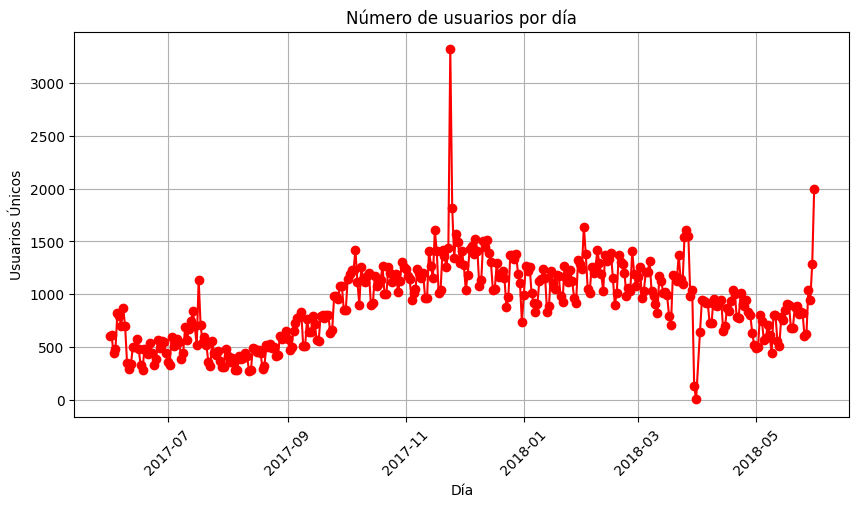

In [51]:
# Graficar
plt.figure(figsize=(10, 5))
plt.plot(daily_users['day'], daily_users['unique_users'], marker='o', linestyle='-', color='red')
plt.xlabel('Día')
plt.ylabel('Usuarios Únicos')
plt.title('Número de usuarios por día')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [52]:
#Calcular los usuarios por semanas 
weekly_users = visits_log_us.groupby('week')['uid'].nunique().reset_index(name='unique_users')

# Calcular el WAU promedio
wau_avg = weekly_users['unique_users'].mean()
print(f"Usuarios promedio por semana (WAU): {wau_avg:.0f}")

Usuarios promedio por semana (WAU): 5825


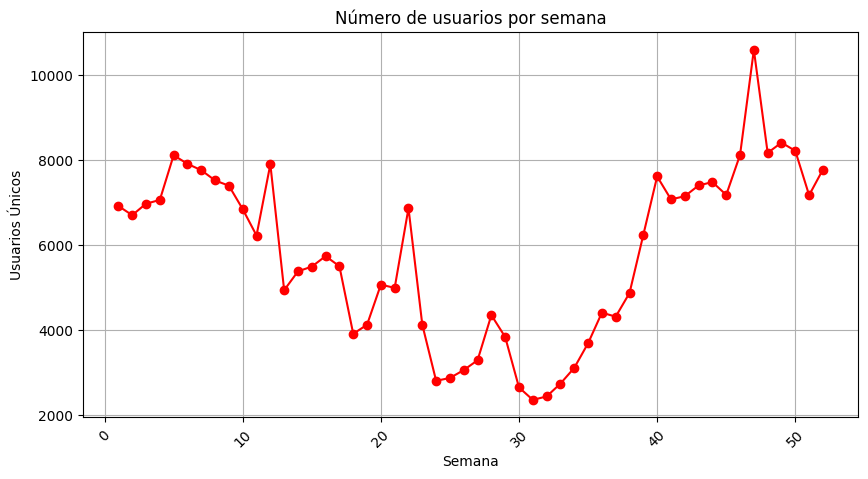

In [53]:
# Graficar
plt.figure(figsize=(10, 5))
plt.plot(weekly_users['week'], weekly_users['unique_users'], marker='o', linestyle='-', color='red')
plt.xlabel('Semana')
plt.ylabel('Usuarios Únicos')
plt.title('Número de usuarios por semana')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [54]:
#Calcular los usuarios por mes
monthly_users = visits_log_us.groupby('month')['uid'].nunique().reset_index(name='unique_users')
# Calcular el MAU promedio
mau_avg = monthly_users['unique_users'].mean()
print(f"Usuarios promedio por mes (MAU): {mau_avg:.0f}")

Usuarios promedio por mes (MAU): 23228


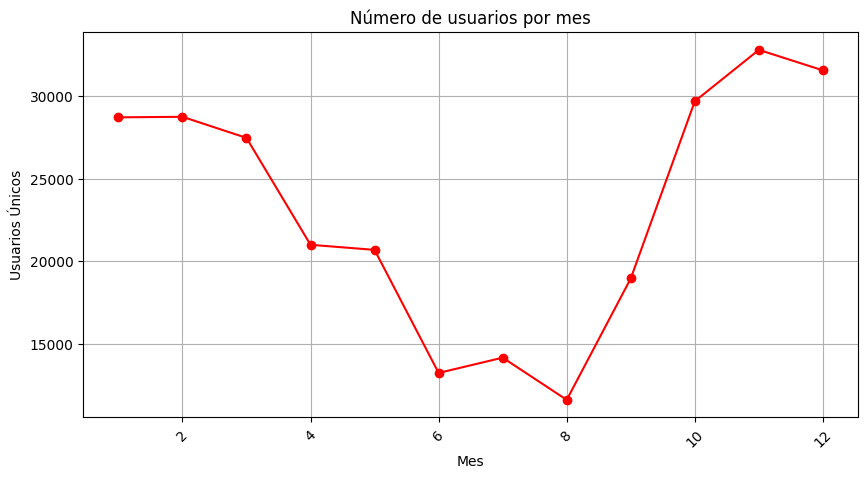

In [55]:
# Graficar
plt.figure(figsize=(10, 5))
plt.plot(monthly_users['month'], monthly_users['unique_users'], marker='o', linestyle='-', color='red')
plt.xlabel('Mes')
plt.ylabel('Usuarios Únicos')
plt.title('Número de usuarios por mes')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Conclusión:** Se puede observar que el aumento de las visitas empiezan a partir del mes de agosto, el promedio por visitas por dias es de 908, semanal es de 5825 y mensual es de 23228.

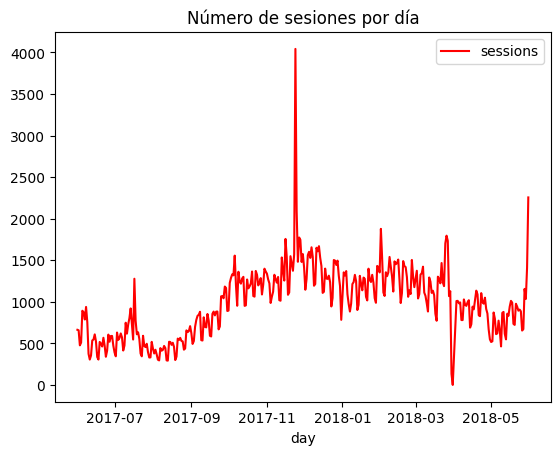

In [56]:
#2.¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
sessions_per_day = visits_log_us.groupby('day')['uid'].count().reset_index(name='sessions')
sessions_per_day.plot(
x='day',
color='red',
title='Número de sesiones por día')
plt.show()

<AxesSubplot:>

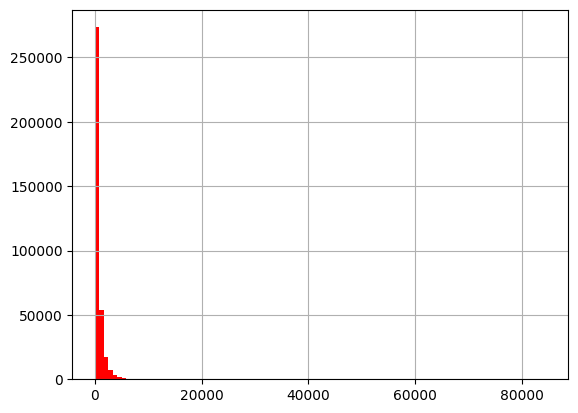

In [152]:
#3. ¿Cuál es la duración de cada sesión?
visits_log_us['session_duration_sec'] = (
   visits_log_us['end_ts'] - visits_log_us['start_ts']
).dt.seconds
visits_log_us['session_duration_sec'].hist(bins=100, color='red')

In [58]:
#4. ¿Con qué frecuencia los usuarios regresan?
print(f"La duración más común de las sesiones es de {visits_log_us['session_duration_sec'].mode()}")

La duración más común de las sesiones es de 0    60
dtype: int64


**Observación:** los datos no se distribuye de forma normal, entonces no es recomendable calcular la frecuencia de visita de usurio con la media y la mediana, se decide calcular con la moda. La duración más común de las sesiones es de 60 segundo, es decir un minutos.

# Ventas

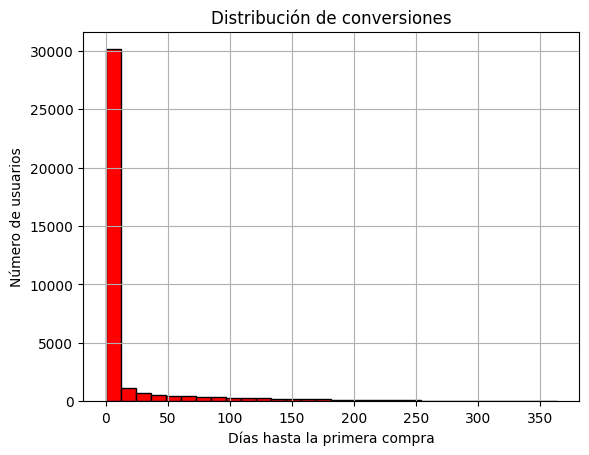

In [118]:
# 1. ¿Cuándo empieza la gente a comprar?
# Obtener la fecha de registro de cada usuario (primera visita)
first_visit = visits_log_us.groupby('uid')['start_ts'].min().reset_index()
first_visit.rename(columns={'start_ts': 'registration_date'}, inplace=True)
orders_log_us_copy=orders_log_us.copy()
orders_log_us_2=orders_log_us.copy()
# Obtener la fecha de la primera compra de cada usuario
first_purchase = orders_log_us_copy.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.rename(columns={'buy_ts': 'first_purchase_date'}, inplace=True)

# Unir las tablas en base al 'uid'
conversion_data = first_visit.merge(first_purchase, on='uid', how='left')

# Calcular la diferencia en días entre el registro y la primera compra
conversion_data['conversion_days'] = (conversion_data['first_purchase_date'] - conversion_data['registration_date']).dt.days

# Clasificar en categorías (0d, 1d, 2d, etc.)
conversion_data['conversion_category'] = 'Conversion ' + conversion_data['conversion_days'].astype(str) + 'd'

# Crear un gráfico de barra
conversion_data['conversion_days'].hist(bins=30, edgecolor='black', color='red')
plt.xlabel('Días hasta la primera compra')
plt.ylabel('Número de usuarios')
plt.title('Distribución de conversiones')
plt.show()

La mayoria de los usurios compran los servicios de eventos los primeros 5 días después de registrados.

In [60]:
#2.¿Cuántos pedidos hacen durante un período de tiempo dado?
orders_per_day = orders_log_us_copy.groupby(orders_log_us_copy['buy_ts'].dt.date)['uid'].count().reset_index()
orders_per_day.rename(columns={'buy_ts': 'date', 'uid': 'orders'}, inplace=True)
print(orders_per_day.head())

         date  orders
0  2017-06-01      96
1  2017-06-02     111
2  2017-06-03      67
3  2017-06-04      66
4  2017-06-05     161


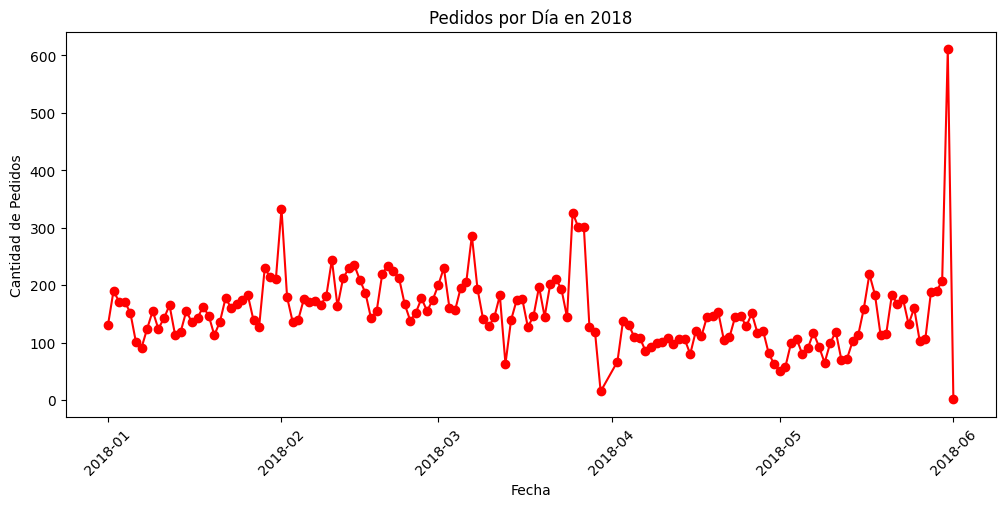

In [61]:
# Filtrar solo los datos del año 2018
orders_per_day['date'] = pd.to_datetime(orders_per_day['date'])

orders_2018 = orders_per_day[orders_per_day['date'].dt.year == 2018]

# Graficar solo los pedidos de 2018
plt.figure(figsize=(12,5))
plt.plot(orders_2018['date'], orders_2018['orders'], marker='o', linestyle='-', color='red')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pedidos')
plt.title('Pedidos por Día en 2018')
plt.xticks(rotation=45)
plt.show()

In [62]:
# 3. ¿Cuál es el tamaño promedio de compra?
average_order_value = orders_log_us_copy['revenue'].sum() / orders_log_us_copy['uid'].nunique()

print(f"El tamaño promedio de compra es: ${average_order_value:.2f}")

El tamaño promedio de compra es: $6.90


In [72]:
# Calcular LTV
orders_log_us['buy_ts'] = pd.to_datetime(orders_log_us['buy_ts'])

# Calcular la primera fecha de compra por usuario
first_order_date_by_customers = orders_log_us.groupby('uid')['buy_ts'].min().reset_index()
first_order_date_by_customers.rename(columns={'buy_ts': 'first_order_date'}, inplace=True)

# Fusionar la primera fecha de compra con orders_log_us
orders_log_us = orders_log_us.merge(first_order_date_by_customers, on='uid', how='left')

# Extraer el mes de la primera compra y de cada compra
orders_log_us['first_order_month'] = orders_log_us['first_order_date'].astype('datetime64[M]')
orders_log_us['order_month'] = orders_log_us['buy_ts'].astype('datetime64[M]')

# Agrupar por cohortes y calcular el ingreso total y número de usuarios únicos por mes
orders_grouped_by_cohorts = orders_log_us.groupby(
    ['first_order_month', 'order_month']
).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()

print(orders_grouped_by_cohorts.head())


  first_order_month order_month  revenue   uid
0        2017-06-01  2017-06-01  9557.49  2023
1        2017-06-01  2017-07-01   981.82    61
2        2017-06-01  2017-08-01   885.34    50
3        2017-06-01  2017-09-01  1931.30    54
4        2017-06-01  2017-10-01  2068.58    88


In [74]:
# Dividir revenue entre la cantidad de valores customer_id para calcular el revenue_per_user
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue']/ orders_grouped_by_cohorts['uid']
)

orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean',
)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [75]:
#Encontrar el ciclo de vida de la cohorte
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['order_month']
    - orders_grouped_by_cohorts['first_order_month']
)
orders_grouped_by_cohorts['cohort_lifetime'].head()

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [76]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head())

0    0.000000
1    0.985647
2    2.004148
3    3.022649
4    4.008296
Name: cohort_lifetime, dtype: float64


In [ ]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
print(orders_grouped_by_cohorts['cohort_lifetime'].head())

In [77]:
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
)
print(
    orders_grouped_by_cohorts[
        ['first_order_month', 'order_month', 'cohort_lifetime']
    ].head()
)
print(
    orders_grouped_by_cohorts[
        ['first_order_month', 'order_month', 'cohort_lifetime']
    ].tail()
)

  first_order_month order_month  cohort_lifetime
0        2017-06-01  2017-06-01                0
1        2017-06-01  2017-07-01                1
2        2017-06-01  2017-08-01                2
3        2017-06-01  2017-09-01                3
4        2017-06-01  2017-10-01                4
   first_order_month order_month  cohort_lifetime
74        2018-03-01  2018-05-01                2
75        2018-04-01  2018-04-01                0
76        2018-04-01  2018-05-01                1
77        2018-05-01  2018-05-01                0
78        2018-06-01  2018-06-01                0


In [78]:
#Convertir los objetos Series de tipo datetime en strings en formato de date.
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')

0     01.06.2017
1     01.06.2017
2     01.06.2017
3     01.06.2017
4     01.06.2017
         ...    
74    01.03.2018
75    01.04.2018
76    01.04.2018
77    01.05.2018
78    01.06.2018
Name: first_order_month, Length: 79, dtype: object

In [81]:
orders_grouped_by_cohorts['first_order_month'] = pd.to_datetime(orders_grouped_by_cohorts['first_order_month'])

# Convertir a formato Año-Mes
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

# Crear tabla dinámica
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean'
)

print(revenue_per_user_pivot)

cohort_lifetime          0          1          2           3          4   \
first_order_month                                                          
2017-06            4.724414  16.095410  17.706800   35.764815  23.506591   
2017-07            6.010218  12.396346  21.035965   10.786094   6.938163   
2017-08            5.276518  11.148793  11.851321   12.182955  16.921250   
2017-09            5.644529  22.188385  13.445200  138.669189  19.881538   
2017-10            5.003733  11.287427   6.753252    7.413152   7.072796   
2017-11            5.154683   7.339054   6.786583   12.510660   7.457284   
2017-12            4.738191   7.816575  39.366019   48.135052  27.431400   
2018-01            4.135636   8.721228  12.365542   11.199767   4.699556   
2018-02            4.156987   8.610000   4.942414    6.941026        NaN   
2018-03            4.838803  11.811667  19.221897         NaN        NaN   
2018-04            4.657597  17.535072        NaN         NaN        NaN   
2018-05     

<AxesSubplot:title={'center':'Tamaño promedio de compra del cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

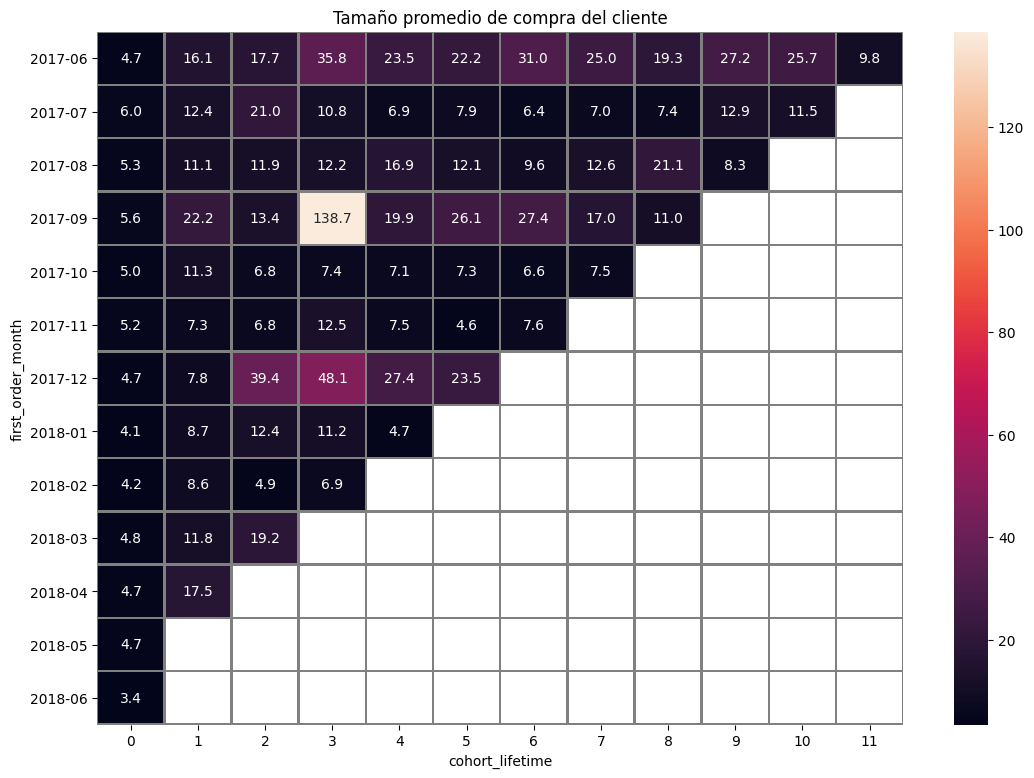

In [83]:
#Gráfico de mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

**Observación:** El tamaño de compra promedio de la cohorte de septiembre de 2017 es la que más se destaca, al igual que el cohorte de diciembre del 2017.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para complementar el análisis deberías mostrar el resultado en una gráfica tipo mapa de calor y debes redactar tus interpretaciones de esta sección
    
</div>

# Marketing

<AxesSubplot:xlabel='buy_ts', ylabel='Count'>

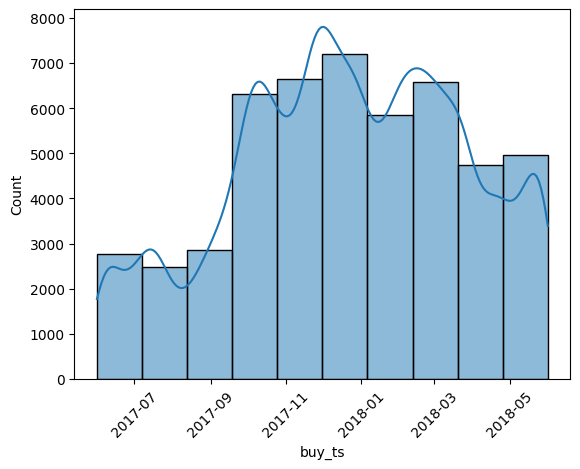

In [86]:
#Gráficar por número de orden el DF orders_log_us
plt.xticks(rotation=45)
sns.histplot(orders_log_us['buy_ts'].astype("datetime64"), bins=10, kde=True)

Los meses de septiembre, octubre, noviembre y diciembre son los que más destacan en número de pedidos.

<AxesSubplot:xlabel='dt', ylabel='Count'>

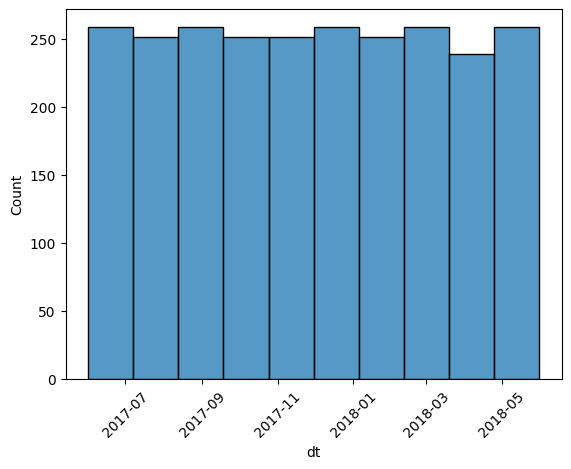

In [88]:
#Gráficar por count costs para el DF costs_us
plt.xticks(rotation=45) #gira las etiquetas en el eje X  
sns.histplot(costs_us['dt'].astype("datetime64"), bins=10)

**LVT**

In [119]:
orders_log_us_2['order_month'] = orders_log_us_2['buy_ts'].astype('datetime64[M]')
costs_us['month'] = costs_us['dt'].astype('datetime64[M]')
first_orders = orders_log_us.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [120]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [133]:
orders_ = pd.merge(orders_log_us_2, first_orders, on=['uid', 'first_order_month'])
orders_.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month,first_order_date,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01 07:58:00


In [134]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [135]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [136]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [137]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


<AxesSubplot:title={'center':'Ciclo de vida'}, xlabel='age', ylabel='first_order_month'>

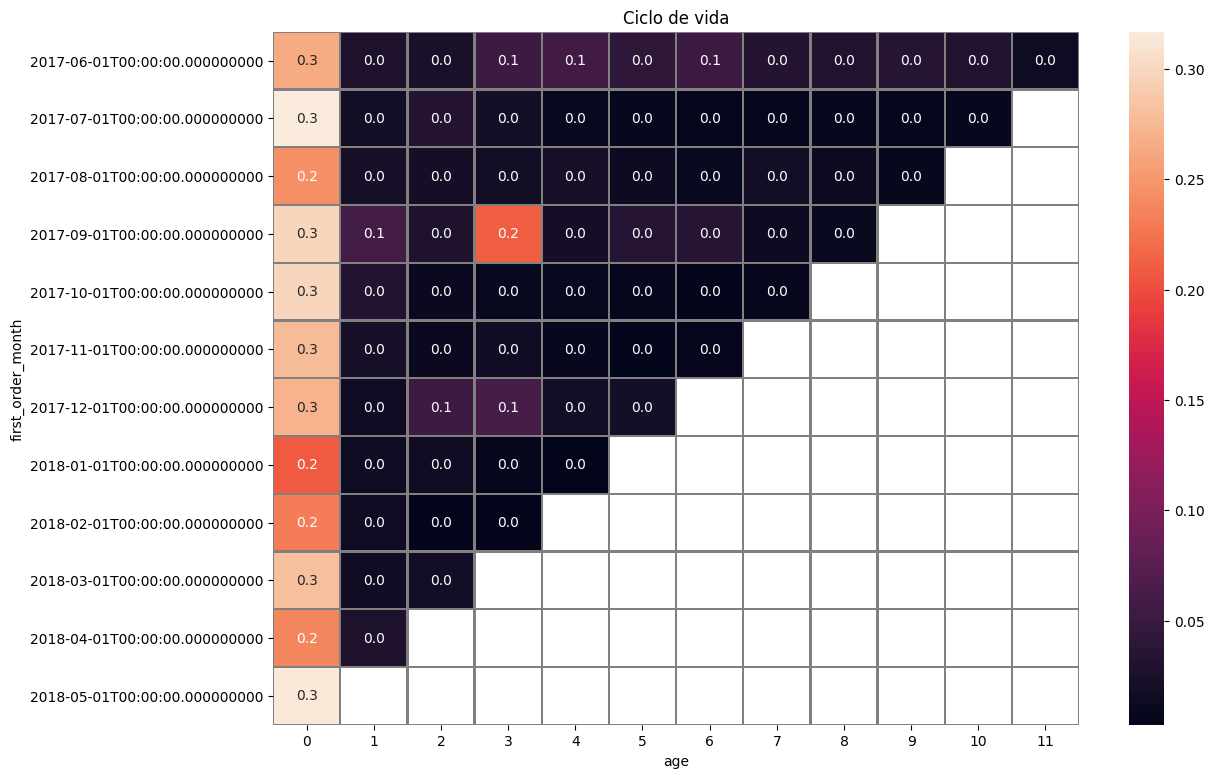

In [151]:
#Gráfico de mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Ciclo de vida')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

In [145]:
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# calcular los costos para el mes de la cohorte
costs_201706 = costs_us[costs_us['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201712['n_buyers'][0]
cac_201706= costs_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 8.905091448344043
LTV = 3.0


Adquirir cada cliente le costó a la empresa un promedio de $8.90, mientras que cada cliente generó $3. Por lo tanto, la inversión en la adquisición de clientes no resultó como se esperaba, generó perdidas.

In [147]:
# calcular los costos por mes
monthly_costs = costs_us.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [148]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


**ROMI (retorno de la inversión en marketing)**

In [149]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.270408
1     0.290992
2     0.315535
3     0.359870
4     0.391473
5     0.429938
6     0.448410
7     0.484976
8     0.526936
9     0.482244
10    0.547329
11    0.666991
dtype: float64

In [153]:
costos_por_fuente = costs_us.groupby('source_id')['costs'].sum().reset_index()

# Ordenar de mayor a menor para ver las fuentes con mayores costos
costos_por_fuente = costos_por_fuente.sort_values(by='costs', ascending=False)

# Ver el resumen de costos por fuente
print(costos_por_fuente)

   source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49


In [158]:
print(costs_us.columns)
print(orders_log_us.columns)

Index(['source_id', 'dt', 'costs', 'month'], dtype='object')
Index(['buy_ts', 'revenue', 'uid', 'first_order_date_x', 'first_order_month',
       'order_month', 'first_order_date_y', 'first_order_date'],
      dtype='object')


In [165]:
# Renombrar las columnas de fecha en ambos DataFrames para que coincidan
costs_us = costs_us.rename(columns={'dt': 'date'})
orders_log_us = orders_log_us.rename(columns={'buy_ts': 'date'})
revenue_vs_cost = pd.merge(costs_us, orders_log_us, on='date')

In [166]:
print(revenue_vs_cost.columns)

Index(['source_id', 'date', 'costs', 'month', 'revenue', 'uid',
       'first_order_date_x', 'first_order_month', 'order_month',
       'first_order_date_y', 'first_order_date'],
      dtype='object')


In [170]:
costos_con_ingresos = revenue_vs_cost.groupby('source_id').agg({'costs': 'sum', 'revenue': 'sum'}).reset_index()
costos_con_ingresos['roi'] = costos_con_ingresos['revenue'] / costos_con_ingresos['costs']
costos_con_ingresos = costos_con_ingresos.sort_values(by='roi', ascending=False)
print(costos_con_ingresos[['source_id', 'roi']])

   source_id       roi
5          9  0.270685
6         10  0.249293
0          1  0.075520
1          2  0.037369
4          5  0.030324
3          4  0.023946
2          3  0.012363


**Conclusión:** 
- Se evidencia que la empresa Showz no es rentable ya que el CAC es mayor al LTV, los usuarios solo compran eventos cuando es necesario por lo cual no hay permanecia de más de un mes en la página. 
- Ningún cohorte  valió la pena porque ninguno es uno o mayor que uno.
-El tamaño promedio de compra es: $6.90
- Adquirir cada cliente le costó a la empresa un promedio de $8.90, mientras que cada cliente generó $3. Por lo tanto, la inversión en la adquisición de clientes no resultó como se esperaba, generó perdidas.
- Los meses de septiembre, octubre, noviembre y diciembre son los que más destacan en número de pedidos.
- Las fuentes más costosas son la 3 y la 4 y no es tan rentable como las fuentes 9 y 10.
- Recomiendo cambiar el plan de markenting, invertiendo más en las fuentes 9 y 10, y haciendo más promociones en los meses de julio hasta diciembre. También es recomendable, hacer una estrategia para los meses con bajas compras.